# Array Displays

Like `CameraDisplays`, ctapipe provides a way to display information related to the array on the ground: `ArrayDisplay`

In [1]:
from ctapipe.visualization import ArrayDisplay
from ctapipe.instrument import SubarrayDescription
from ctapipe.coordinates import GroundFrame, EastingNorthingFrame
from ctapipe.containers import HillasParametersContainer

from astropy.coordinates import SkyCoord
from astropy import units as u

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
tel_ids = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,38,39,40,41,42,
 43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,
 63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79]


subarray = SubarrayDescription.read(
    "/home/irene/grid/ctapipe_tests/data/simtel/gamma/gamma_20deg_180deg_run000012___cta-prod6-paranal-2147m-Paranal-divergent-div0.0043-dark.simtel.zst"
    #"dataset://gamma_20deg_0deg_run1___cta-prod5-lapalma_desert-2158m-LaPalma-dark_100evts.simtel.zst"
).select_subarray(tel_ids)

An array display is created for example in `subarray.peek()`:

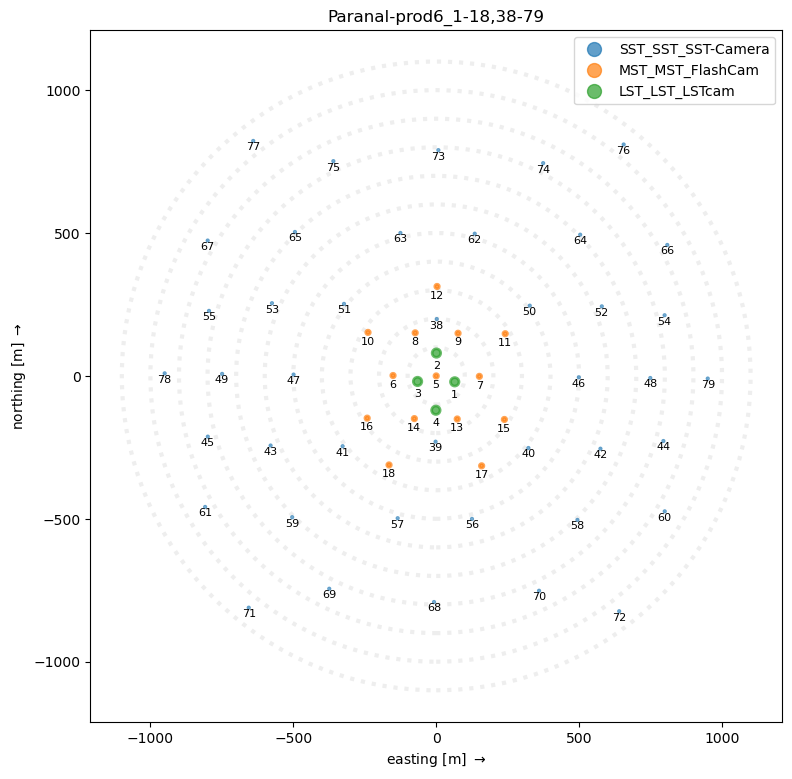

In [3]:
subarray.peek()

However, you can make one manually with a bit more flexibility:

## Constructing an ArrayDisplay

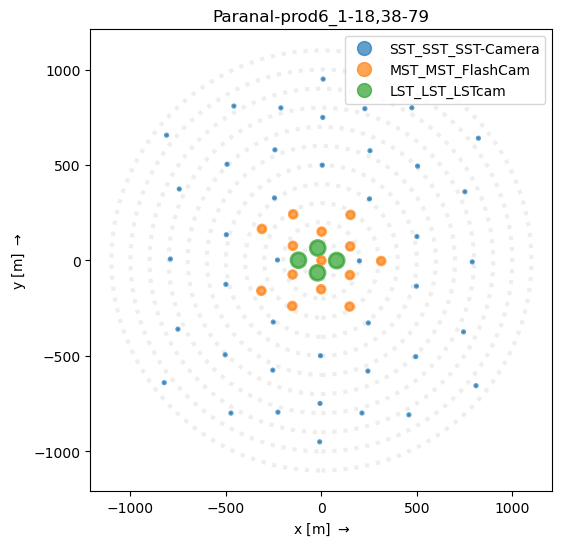

In [4]:
disp = ArrayDisplay(subarray)

You can specify the Frame you want as long as it is compatible with `GroundFrame`.  `EastingNorthingFrame` is probably the most useful.  You can also add telescope labels

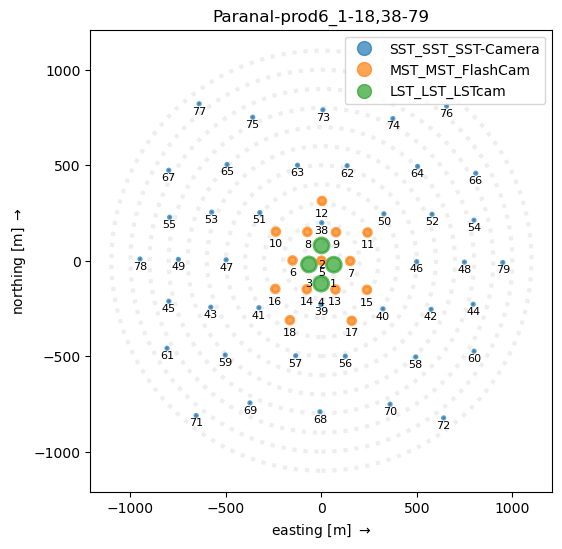

In [5]:
disp = ArrayDisplay(subarray, frame=EastingNorthingFrame())
disp.add_labels()

## Using color to show information 

By default the color  of the telescope circles correlates to telescope type. However, you can use color to convey other information  by setting the `values` attribute, like a trigger pattern

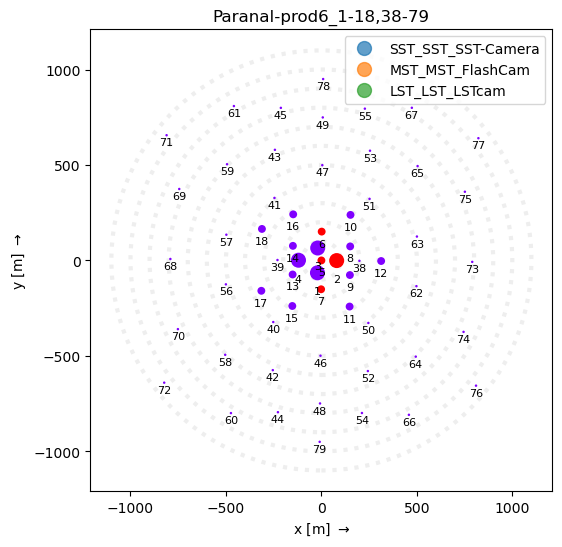

In [6]:
plt.set_cmap("rainbow")  # the array display will use the current colormap for values

ad = ArrayDisplay(subarray)
ad.telescopes.set_linewidth(0)  # to turn off the telescope borders

trigger_pattern = np.zeros(subarray.n_tels)
trigger_pattern[
    [
        1,
        4,
        5,
        6,
    ]
] = 1
ad.values = trigger_pattern  # display certain telescopes in a color
ad.add_labels()

or for example, you could use color to represent the telescope distance to the impact point

In [7]:
shower_impact = SkyCoord(200 * u.m, -200 * u.m, 0 * u.m, frame=EastingNorthingFrame())

In [8]:
array_center=[-1.37367816*u.m,  0.05862069*u.m, 30.53448276*u.m]

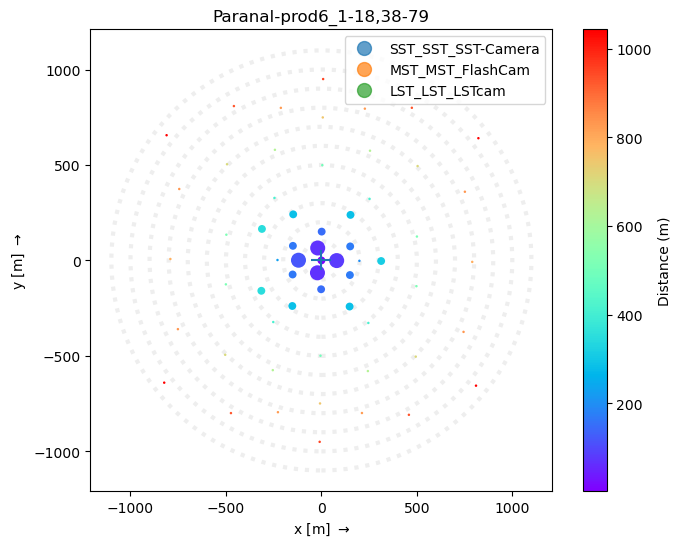

In [9]:
plt.set_cmap("rainbow")  # the array display will use the current colormap for values
ad = ArrayDisplay(subarray)
ad.telescopes.set_linewidth(0)  # to turn off the telescope borders
plt.scatter(array_center[0], array_center[1], marker="+", s=200)

distances = np.hypot(
    subarray.tel_coords.cartesian.x - array_center[0],
    subarray.tel_coords.cartesian.y - array_center[1],
)
ad.values = distances
plt.colorbar(ad.telescopes, label="Distance (m)")

In [10]:
subarray.tel_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79])

In [11]:
group1=[]
group2=[]
group3=[]
group4=[]
distances = np.hypot(
    subarray.tel_coords.cartesian.x - array_center[0],
    subarray.tel_coords.cartesian.y - array_center[1],
)
for i in range(len(distances)):
    if distances[i].value < 250:
        group1.append(subarray.tel_ids[i])
    elif distances[i].value > 250 and distances[i].value<500:
        group2.append(subarray.tel_ids[i])
    elif distances[i].value > 500 and distances[i].value<800:
        group3.append(subarray.tel_ids[i])
    else:
        group4.append(subarray.tel_ids[i])

In [12]:
print(group1)
print(group2)
print(group3)
print(group4)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 38, 39]
[10, 11, 12, 15, 16, 17, 18, 40, 41, 46, 47, 50, 51]
[42, 43, 48, 49, 52, 53, 56, 57, 58, 59, 62, 63, 64, 65, 68, 73]
[44, 45, 54, 55, 60, 61, 66, 67, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79]


In [13]:
subarray.positions

{1: <Quantity [-20.64, -64.82,  34.  ] m>,
 2: <Quantity [79.99, -0.77, 29.  ] m>,
 3: <Quantity [-19.4,  65.2,  31. ] m>,
 4: <Quantity [-120.03,    1.15,   33.  ] m>,
 5: <Quantity [-2.0e-02, -0.0e+00,  2.4e+01] m>,
 6: <Quantity [  1.43, 151.02,  25.  ] m>,
 7: <Quantity [  -1.47, -151.02,   31.  ] m>,
 8: <Quantity [150.72,  73.57,  21.  ] m>,
 9: <Quantity [149.28, -76.45,  26.  ] m>,
 10: <Quantity [152.31, 238.59,  24.  ] m>,
 11: <Quantity [ 147.7 , -241.47,   30.  ] m>,
 12: <Quantity [313.02,  -3.  ,  19.  ] m>,
 13: <Quantity [-150.76,  -73.57,   28.  ] m>,
 14: <Quantity [-149.32,   76.45,   28.  ] m>,
 15: <Quantity [-152.34, -238.59,   38.5 ] m>,
 16: <Quantity [-147.73,  241.47,   27.  ] m>,
 17: <Quantity [-314.61, -159.02,   35.  ] m>,
 18: <Quantity [-311.5 ,  165.03,   30.5 ] m>,
 38: <Quantity [199.01,  -1.91,  16.25] m>,
 39: <Quantity [-230.05,    2.21,   22.75] m>,
 40: <Quantity [-252.17, -322.65,   40.75] m>,
 41: <Quantity [-245.93,  327.43,   17.25] m>,
 42: 

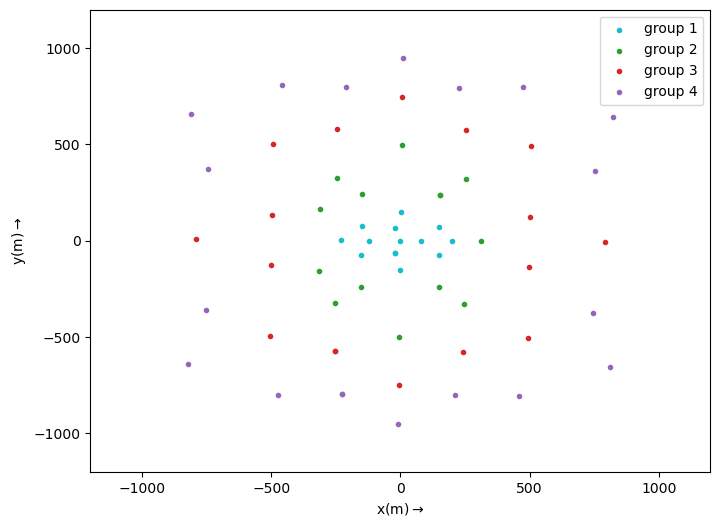

In [14]:
for i in group1:
    plt.scatter(subarray.positions[i][0],subarray.positions[i][1],color='tab:cyan',marker='.')
for i in group2:
    plt.scatter(subarray.positions[i][0],subarray.positions[i][1],color='tab:green',marker='.')
for i in group3:
    plt.scatter(subarray.positions[i][0],subarray.positions[i][1],color='tab:red',marker='.')
for i in group4:
    plt.scatter(subarray.positions[i][0],subarray.positions[i][1],color='tab:purple',marker='.')
plt.xlim(-1200,1200)
plt.ylim(-1200,1200)
plt.scatter(subarray.positions[1][0],  subarray.positions[1][1],  color='tab:cyan',   marker='.', label='group 1')
plt.scatter(subarray.positions[10][0], subarray.positions[10][1], color='tab:green',  marker='.', label='group 2')
plt.scatter(subarray.positions[42][0], subarray.positions[42][1], color='tab:red',    marker='.', label='group 3')
plt.scatter(subarray.positions[44][0], subarray.positions[44][1], color='tab:purple', marker='.', label='group 4')
plt.xlabel(r'x(m)$\rightarrow$')
plt.ylabel(r'y(m)$\rightarrow$')
plt.legend()

In [15]:
from divtel.telescope import Telescope
from divtel.array import Array
import astropy.units as u
import numpy as np

from divtel import utils

def LoadConfig(file, tel_id=-1, radius="degrees", frame=None, **kwargs):
    
    """
    Load the telescope configuration file
    
    Parameters
    ----------
    file: str 
        File name
    tel_id: int, optional
        If you want to load only a single telescope,
        you can set this parameter (defalut: -1)
    radius: str, optional
        Define the unit of camera radius
        either `meters` or `degrees` (default: degrees).
    frame: class.CTA_Info, optional
    kwargs: args for class.Array
        
    Returns
    -------
    class.Array
    """

    with open(file, "r") as f:
        
        tels = []
        for i, line in enumerate(f.readlines()):
            line = np.asarray(line.split()).astype("float")

            if (radius!="meters"):
                line[4] = utils.convert_radius(line[4]*u.deg, line[3], toDeg=False)
            
            coord = [x*u.m for x in line]

            tel = Telescope(i+1, coord[0],coord[1],coord[2],coord[3],coord[4])
            tels.append(tel)

    if tel_id == -1:
        return Array(tels, frame=frame, **kwargs)
    else:
        return tels[tel_id-1]

In [16]:
from divtel.telescope import Telescope
from divtel.array import Array
import astropy.units as u
import numpy as np

from divtel import utils

def LoadTable(table, tel_id=-1, radius="degrees", frame=None, **kwargs):
    tels = []
    for i in range(len(table)):
            #line = np.asarray(line.split()).astype("float")

            #if (table['radius'][i].unit!=u.m):
                #table['radius'][i] = utils.convert_radius(table['radius'][i]*u.deg, table['focal'][i], toDeg=False)
            
            

            tel = Telescope(table['id'][i], table['x'][i]*u.m,table['y'][i]*u.m,table['z'][i]*u.m,table['focal'][i]*u.m,table['radius'][i]*u.m)
            tels.append(tel)

    if tel_id == -1:
        return Array(tels, frame=frame, **kwargs)
    else:
        return tels[tel_id-1]

In [17]:
from divtel import *
#fom divtel.array import Array

In [18]:
array = LoadConfig("/home/irene/ctasoft/divtel/config/CTA-PROD6_TelescopePositionsParanal.txt")
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.64,-64.82,34.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,67.77
2,79.99,-0.77,29.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,81.38
3,-19.4,65.2,31.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,67.59
4,-120.03,1.15,33.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,118.69
5,-0.02,-0.0,24.0,0.000,0.000,1.571,16.000,1.077,0.014,1.000,-0.000,0.000,6.67
6,1.43,151.02,25.0,0.000,0.000,1.571,16.000,1.077,0.014,1.000,-0.000,0.000,151.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,953.2,-208.19,7.75,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,977.29


In [19]:
array.table['radius'].unit

Unit("m")

In [20]:
array.table['radius'][85]

0.43581270336245526

In [21]:
#array.divergent_pointing(div = 0, az = 180, alt = 70)

In [22]:
#array.table.units='deg'
#array.table

In [23]:
array.hFoV(m_cut=4)

<Quantity 62.11150148 deg2>

In [24]:
from divtel.layout import LoadTable
from divtel.array import *

In [25]:
subarray1=array.table[:0].copy()
subarray2=array.table[:0].copy()
subarray3=array.table[:0].copy()
subarray4=array.table[:0].copy()
sub_groups={'1': group1, 
            '2': group2,
            '3': group3, 
            '4': group4,
            }
for i in range(len(array.table['id'])):
    for tel_id in group1:
        if array.table['id'][i] == tel_id:
            subarray1.add_row(array.table[i])
    for tel_id in group2:
        if array.table['id'][i] == tel_id:
            subarray2.add_row(array.table[i])
    for tel_id in group3:
        if array.table['id'][i] == tel_id:
            subarray3.add_row(array.table[i])
    for tel_id in group4:
        if array.table['id'][i] == tel_id:
            subarray4.add_row(array.table[i])
                   
                          
            
G1=LoadTable(subarray1)
G2=LoadTable(subarray2)
G3=LoadTable(subarray3)
G4=LoadTable(subarray4)
G4.divergent_pointing(div = -0.002, az = 180, alt = 70)
G3.divergent_pointing(div = -0.001, az = 180, alt = 70)
G2.divergent_pointing(div = 0.001, az = 180, alt = 70)
G1.divergent_pointing(div = 0.003, az = 180, alt = 70)

G3.table.units='deg'
G3.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
42,-254.59,-574.69,54.25,180.970,70.129,19.871,5.600,4.450,62.462,-0.340,0.006,0.940,629.14
43,-243.51,579.47,8.25,179.022,70.132,19.868,5.600,4.450,62.462,-0.340,-0.006,0.940,628.79
48,-7.21,-749.1,62.25,181.255,69.992,20.008,5.600,4.450,62.462,-0.342,0.007,0.940,749.99
49,7.17,749.1,12.75,178.746,69.994,20.006,5.600,4.450,62.462,-0.342,-0.007,0.940,749.26
52,243.48,-579.47,41.25,180.964,69.863,20.137,5.600,4.450,62.462,-0.344,0.006,0.939,628.75
53,254.55,574.69,17.75,179.044,69.862,20.138,5.600,4.450,62.462,-0.344,-0.006,0.939,628.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,497.8,-134.81,12.25,180.223,69.735,20.265,5.600,4.450,62.462,-0.346,0.001,0.938,516.00


In [26]:
G4.table.units='deg'
G4.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
44,-227.7,-795.0,68.25,182.698,70.213,19.787,5.600,4.450,62.462,-0.338,0.016,0.941,827.50
45,-212.4,799.22,10.25,177.291,70.219,19.781,5.600,4.450,62.462,-0.338,-0.016,0.941,827.38
54,212.36,-799.22,56.25,182.643,69.744,20.256,5.600,4.450,62.462,-0.346,0.016,0.938,827.20
55,227.66,795.0,25.25,177.373,69.740,20.260,5.600,4.450,62.462,-0.346,-0.016,0.938,827.08
60,-473.8,-799.64,76.25,182.753,70.476,19.524,5.600,4.450,62.462,-0.334,0.016,0.943,930.21
61,-458.36,808.58,17.25,177.218,70.481,19.519,5.600,4.450,62.462,-0.334,-0.016,0.943,929.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,744.56,-374.23,4.25,181.201,69.211,20.789,5.600,4.450,62.462,-0.355,0.007,0.935,834.10


In [27]:
G1.table.units='deg'
G1.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.64,-64.82,34.0,179.674,69.984,20.016,28.000,2.150,14.536,-0.342,-0.002,0.940,66.40
2,79.99,-0.77,29.0,179.996,70.144,19.856,28.000,2.150,14.536,-0.340,-0.000,0.941,88.58
3,-19.4,65.2,31.0,180.327,69.985,20.015,28.000,2.150,14.536,-0.342,0.002,0.940,66.15
4,-120.03,1.15,33.0,180.005,69.824,20.176,28.000,2.150,14.536,-0.345,0.000,0.939,111.65
5,-0.02,-0.0,24.0,180.000,70.012,19.988,16.000,3.850,46.707,-0.342,-0.000,0.940,9.00
6,1.43,151.02,25.0,180.759,70.013,19.987,16.000,3.850,46.707,-0.342,0.005,0.940,151.28
7,-1.47,-151.02,31.0,179.240,70.012,19.988,16.000,3.850,46.707,-0.342,-0.005,0.940,151.32
8,150.72,73.57,21.0,180.375,70.254,19.746,16.000,3.850,46.707,-0.338,0.002,0.941,175.51


In [28]:
#G4.divergent_pointing(div = -0.001, az = 180, alt = 70)

<Quantity 113.28889312 deg2>

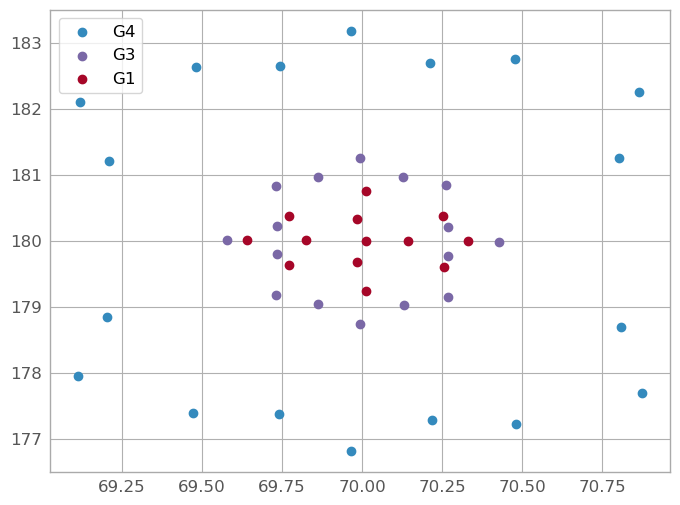

In [29]:
plt.scatter(G4.table['alt'],G4.table['az'],label='G4')
'''for i in range (len(G4.table)):
    plt.annotate(G4.table['id'][i],(G4.table['alt'][i],G4.table['az'][i]));'''
plt.scatter(G3.table['alt'],G3.table['az'],label='G3')
plt.scatter(G1.table['alt'],G1.table['az'],label='G1')
plt.legend();
G4.hFoV(m_cut=4)

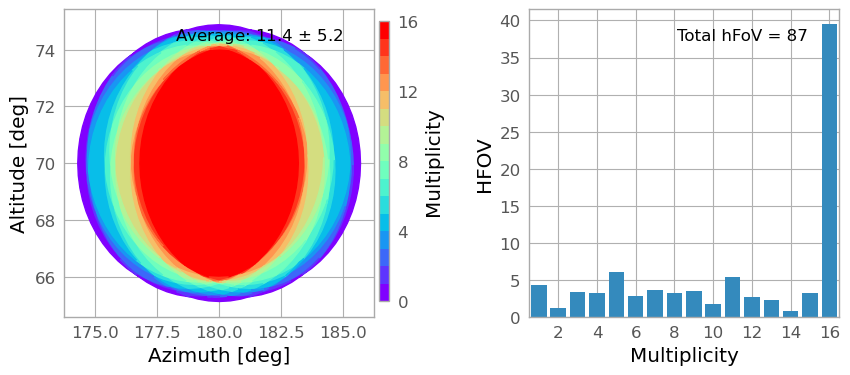

In [30]:
G3.multiplicity_plot()

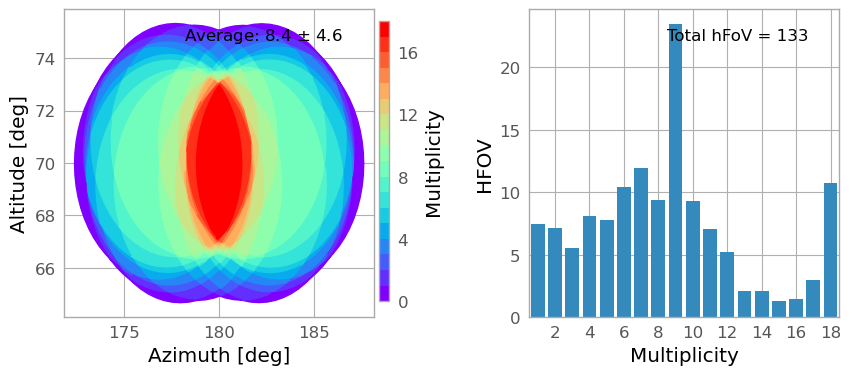

In [31]:
G4.multiplicity_plot()

/home/irene/ctasoft/divtel/divtel/visualization.py:337: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  patch_az = np.asarray(pol_map['coordinates'])[0][:][0]


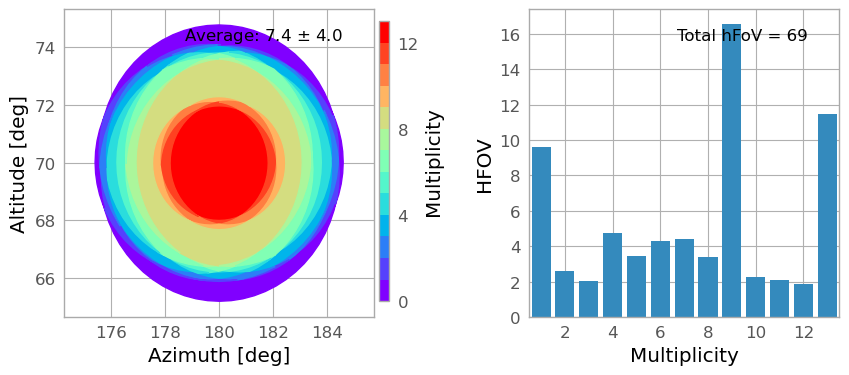

In [32]:
G1.multiplicity_plot()

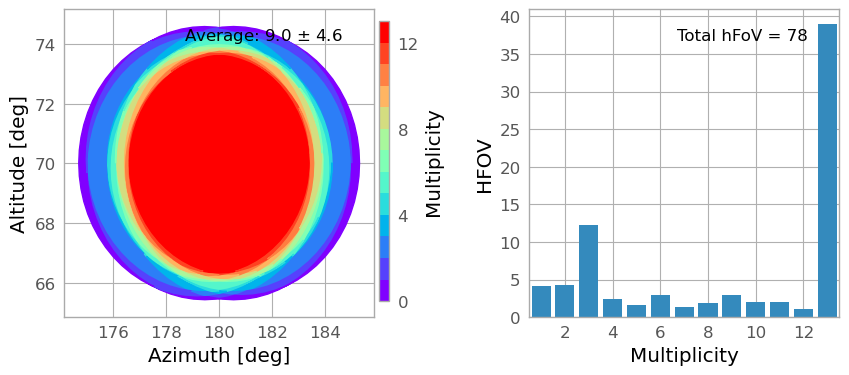

In [33]:
G2.multiplicity_plot()

In [34]:
tab=G2.table.copy()
for i in range(len(G1.table)):
    tab.add_row(G1.table[i])
for i in range(len(G3.table)):
    tab.add_row(G3.table[i])
for i in range(len(G4.table)):
    tab.add_row(G4.table[i])

In [35]:
G2.get_pointing_coord(icrs=False)

<SkyCoord (AltAz: obstime=2023-10-25T11:22:34.950, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(180.40136586, 70.09390188), (179.59306014, 70.09257546),
     (179.99453258, 70.18006048), (179.60142297, 69.93269799),
     (180.40266465, 69.93290888), (179.73546791, 69.84502332),
     (180.27377061, 69.8457929 ), (179.46270203, 69.87909559),
     (180.5445799 , 69.87779962), (179.16314898, 70.01082039),
     (180.83630934, 70.01049755), (179.44674528, 70.14459918),
     (180.54450248, 70.14594687)]>

In [36]:
tab

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10,152.31,238.59,24.0,180.401,70.094,19.906,16.000,3.850,46.707,-0.340,0.002,0.940,296.56
11,147.7,-241.47,30.0,179.593,70.093,19.907,16.000,3.850,46.707,-0.340,-0.002,0.940,296.55
12,313.02,-3.0,19.0,179.995,70.180,19.820,16.000,3.850,46.707,-0.339,-0.000,0.941,337.24
15,-152.34,-238.59,38.5,179.601,69.933,20.067,16.000,3.850,46.707,-0.343,-0.002,0.939,271.30
16,-147.73,241.47,27.0,180.403,69.933,20.067,16.000,3.850,46.707,-0.343,0.002,0.939,271.07
17,-314.61,-159.02,35.0,179.735,69.845,20.155,16.000,3.850,46.707,-0.345,-0.002,0.939,331.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,744.56,-374.23,4.25,181.201,69.211,20.789,5.600,4.450,62.462,-0.355,0.007,0.935,834.10


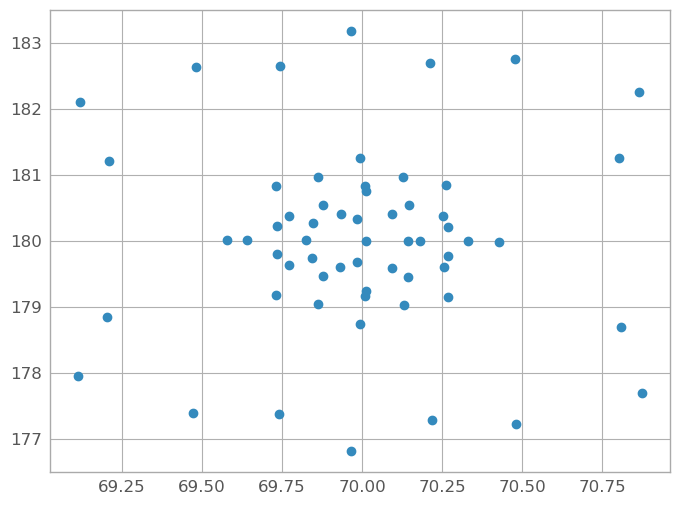

In [37]:
plt.scatter(tab['alt'],tab['az'])

In [38]:
unit=u.rad
a=np.pi*unit
a.to(u.deg)

<Quantity 180. deg>

In [39]:
len(tab['alt'].to(u.deg))

60

In [40]:
len(G2.table)

13

In [41]:
G2.frame.altaz

<AltAz Frame (obstime=2023-10-25T11:22:34.950, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [42]:
from divtel.utils import hfov_from_table
hfov=hfov_from_table(tab,m_cut=4,full_output=True)

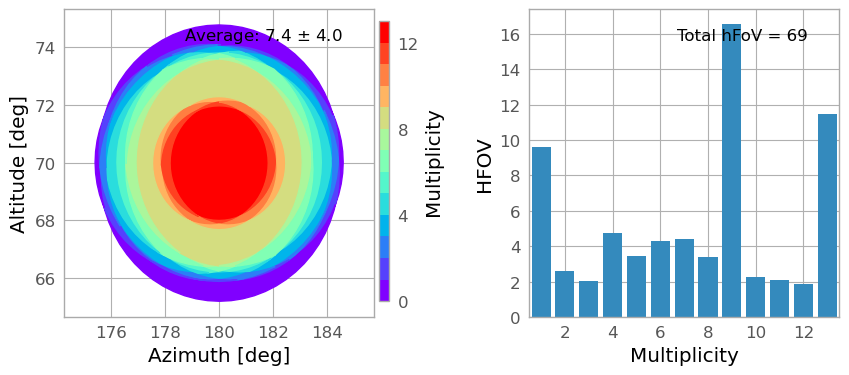

In [43]:
from divtel.visualization import multiplicity_plot
multiplicity_plot(G1,m_cut=0)

In [44]:
m, overlaps, geoms = G1.hFoV(m_cut=0, full_output=True)
len(overlaps),len(geoms)

(74, 74)

In [45]:
m, overlaps, geoms = G1.hFoV(m_cut=4, full_output=True)
len(overlaps),len(geoms)

(44, 44)

In [46]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import widgets
from IPython.display import display

import copy

import astropy.units as u
from astropy.coordinates import SkyCoord

from astroplan.plots import plot_sky
from astroplan import FixedTarget



import mpl_toolkits.axisartist.angle_helper as angle_helper
from mpl_toolkits.axisartist import SubplotHost, ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

from shapely.geometry import mapping
from descartes import PolygonPatch


In [47]:
cut=3

In [48]:
polygons = {}
for i in range(len(tab['az'])):
    if max(tab["az"])-min(tab['az']) > 180:
            
        
        if tab['az'][i] < 180:
            polygons[i]=(Point(tab['az'][i],tab["alt"][i]).buffer(tab['radius'][i]))
        else:
            polygons[i]=(Point(tab['az'][i]-360,tab["alt"][i]).buffer(tab['radius'][i]))
    
    else:

        polygons[i] = Point(tab['az'][i],tab["alt"][i]).buffer(tab['radius'][i])

In [49]:
rings = [LineString(list(pol.exterior.coords)) for pol in polygons.values()]
union = unary_union(rings)
result = {counter:geom for counter, geom in enumerate(polygonize(union))}

ori = list(polygons.values())
res = list(result.values())

dict_count_overlaps = {}
for i in range(len(res)):
    dict_count_overlaps[i] = 0
    for j in range(len(ori)):
         if np.isclose(res[i].difference(ori[j]).area, 0):
            dict_count_overlaps[i] +=1
             #print(f"res_{colors[i]}, orig_{j+1}")


max_multiplicity = max(dict_count_overlaps.values())


In [50]:
overlaps = np.array(list(dict_count_overlaps.values()))
#print(len(res), len(overlaps_nocut))
eff_hfov = []
eff_overlaps=[]
eff_res=[]
for i,patchsky in enumerate(res):
    
    if overlaps[i]>=cut:
        eff_overlaps.append(overlaps[i])
        eff_hfov.append(patchsky.area)
        eff_res.append(res[i])

Text(0.9, 0.9, 'Average multiplicity: 27.7 ')

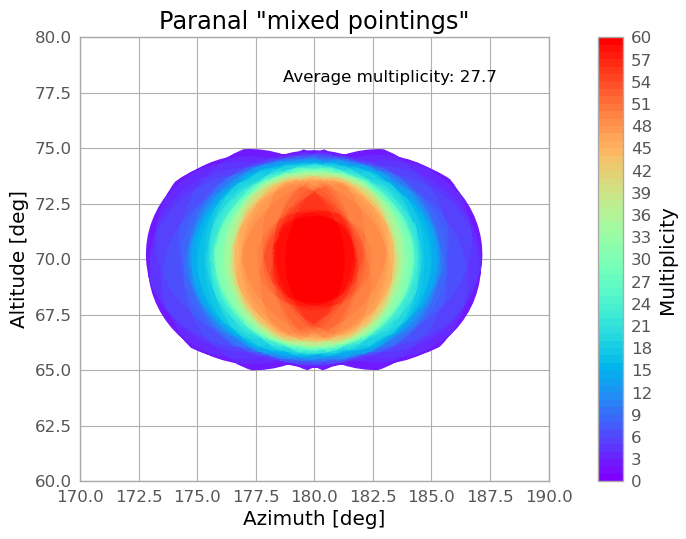

In [54]:
eff_res=np.array(eff_res)
eff_hfov= np.array(eff_hfov) 
eff_overlaps= np.array(eff_overlaps) 
average_overlap = np.average(eff_overlaps, weights=eff_hfov)



cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_multiplicity))
minmax = []

bounds = np.arange(max_multiplicity + 1) + 1
fig = plt.figure(figsize=(7,6))
gs  = mpl.gridspec.GridSpec(1, 2, width_ratios=[0.95, 0.05])

ax = plt.subplot(gs[0])
ax_cb = plt.subplot(gs[1])
ax.set_title(r'Paranal "mixed pointings"')
fig.subplots_adjust(top=0.85)

    
for pol_id, pol in enumerate (eff_res):
    colore = eff_overlaps[pol_id]
    ax.add_patch(
         PolygonPatch(mapping(pol), color=color_list[colore-1])
    )


norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax_cb,
                                 norm=norm,
                                 cmap=cmap,
                                 boundaries = bounds,
                                 orientation='vertical',
                                 label='Multiplicity')
cb1.set_ticks(np.arange(0, max_multiplicity+1, step=3) + 1)
cb1.set_ticklabels(np.arange(0, max_multiplicity+1, step=3))
Drawing_colored_circle = plt.Circle((0,70),10, fill= False ,color = 'k',label=f'r=10deg')
#Drawing_colored_circle_1 = plt.Circle((pointing.az.deg, pointing.alt.deg),10, fill= False ,color = 'k',label=f'r=10deg',linestyle='--')
 
#ax.set_aspect( 1 )
#ax.add_artist( Drawing_colored_circle)
#ax.add_artist( Drawing_colored_circle_1)

ax.set_xlabel("Azimuth [deg]")
ax.set_ylabel("Altitude [deg]")
ax.set_xlim(170,190)
ax.set_ylim(60,80)
#ax.set_xlim(np.min(tab['az'])-5, np.max(tab['az'])+5)
#ax.set_ylim(np.min(tab['alt'])-5, np.max(tab['alt'])+5)
#ax.legend(loc='lower right')
ax.text(0.9, 0.9, r"Average multiplicity: {:.1f} ".format(average_overlap), 
        ha="right", transform=ax.transAxes)




133.4074756604622 deg2


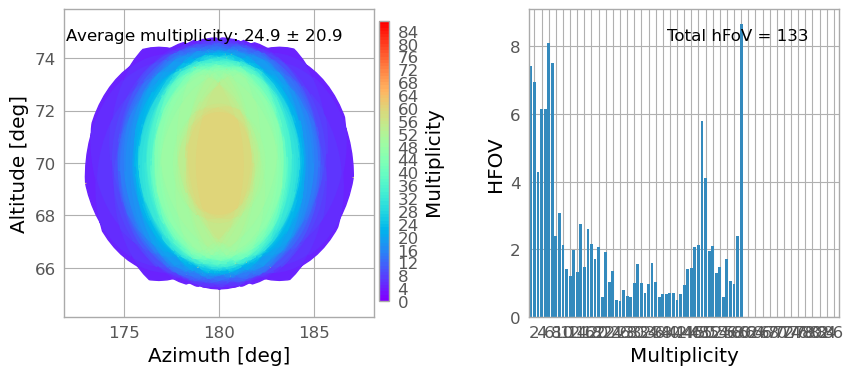

In [52]:
m_cut=0
fig=None
m, overlaps, geoms = hfov
max_m = int(array.size_of_array)
ave_multi = np.average(m[:,0], weights=m[:,1])
var_multi = np.average((m[:,0]-ave_multi)**2, weights=m[:,1])

if fig is None:
    fig = plt.figure(figsize=(10, 4)) 

cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_m))
bounds = np.arange(max_m + 1) + 1

gs  = mpl.gridspec.GridSpec(1, 2)

ax = plt.subplot(gs[0])
ax_cb = fig.add_axes([0.44,0.15,0.01,0.7])
ax_mul = plt.subplot(gs[1])

plt.subplots_adjust(wspace=0.5)

cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_m))

minmax = []
for i, pol in enumerate(geoms):
    colore = int(overlaps[i])
    pol_map = mapping(pol)
    ax.add_patch(PolygonPatch(pol_map, color=color_list[colore-1]))
    patch_az = np.asarray(pol_map['coordinates'])[0][:][0]
    minmax.append([min(patch_az), max(patch_az)])
minmax = np.asarray(minmax)

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax_cb,
                                 norm=norm,
                                 cmap=cmap,
                                 boundaries = bounds,
                                 orientation='vertical',
                                 label='Multiplicity')
cb1.set_ticks(np.arange(0, max_m+1, step=4) + 1)
cb1.set_ticklabels(np.arange(0, max_m+1, step=4))

ax.set_xlabel("Azimuth [deg]")
ax.set_ylabel("Altitude [deg]")
#print(np.min(minmax[:,1])-5)
ax.set_xlim(np.min(tab['az'])-5, np.max(tab['az'])+5)
ax.set_ylim(np.min(tab["alt"])-5, np.max(tab["alt"])+5)

ax.text(0.9, 0.9, r"Average multiplicity: {:.1f} $\pm$ {:.1f}".format(ave_multi, np.sqrt(var_multi)), 
        ha="right", transform=ax.transAxes)

ax_mul.bar(m[:,0], m[:,1])
ax_mul.text(0.9, 0.9, "Total hFoV = {:.0f}".format(sum(m[:,1][m[:,0]>=m_cut])), ha="right", transform=ax_mul.transAxes)
ax_mul.set_xticks(np.arange(0, max_m+1, step=2))
ax_mul.set_xlim(0.5, max_m+0.5)
ax_mul.set_ylabel('HFOV')
ax_mul.set_xlabel('Multiplicity')
print(hfov_from_table(tab))

In [ ]:
array.divergent_pointing(-0.015,alt=90,az=180)
#print(array.hFoV(m_cut=4))
#multiplicity_plot(array,m_cut=4)
array.display('xyz')

In [ ]:
multiplicity_plot(array,m_cut=0)

In [ ]:
G4.display('yz')

In [ ]:
G4.display('xz')

In [ ]:
G4.display('xy')

In [ ]:
G4.hFoV(m_cut=6) ### wrong?

## Overlaying vectors

For plotting reconstruction quantities, it's useful to overlay vectors on the telescope positions. `ArrayDisplay` provides functions:
* `set_vector_uv` to set by cartesian coordinates from the center of each telescope
* `set_vector_rho_phi` to set by polar coorinates from the center of each telescope
* `set_vector_hillas` to set vectors from a `dict[int,HillasParameters]` mapping tel_id (not index!) to a set of parameters. 

In [ ]:
np.random.seed(0)
phis = np.random.uniform(0, 180.0, size=subarray.n_tels) * u.deg
rhos = np.ones(subarray.n_tels) * 200 * u.m


ad = ArrayDisplay(subarray, frame=EastingNorthingFrame(), tel_scale=2)
ad.set_vector_rho_phi(rho=rhos, phi=phis)

## Overlaying Image Axes

For the common use case of plotting image axis on an `ArrayDisplay`, the `set_line_hillas()` method is provided for convenience. The following example shows its use: 

In [ ]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from ctapipe.calib import CameraCalibrator
from ctapipe.image import ImageProcessor
from ctapipe.io import EventSource
from ctapipe.reco import ShowerProcessor
from ctapipe.utils import get_dataset_path
from ctapipe.visualization import ArrayDisplay
from IPython import display
from matplotlib.animation import FuncAnimation

input_url =  "/home/irene/grid/shared_folder/analyses/test_ctapipe/data/simtel/gamma/gamma_20deg_180deg_run000018___cta-prod6-paranal-2147m-Paranal-divergent-div0.0043-dark.simtel.zst"
    #"dataset://gamma_20deg_0deg_run1___cta-prod5-lapalma_desert-2158m-LaPalma-dark_100evts.simtel.zst"
#"dataset://gamma_LaPalma_baseline_20Zd_180Az_prod3b_test.simtel.gz"

First, we define a function to plot the array with overlaid lines for the image axes

In [ ]:
def plot_event(event, subarray, ax):
    """
    Draw an ArrayDisplay with image axes and the
    true and reconstructed impact position overlaid
    """

    array_pointing = SkyCoord(
        az=event.pointing.array_azimuth,
        alt=event.pointing.array_altitude,
        frame="altaz",
    )

    angle_offset = event.pointing.array_azimuth
    disp = ArrayDisplay(subarray, axes=ax)

    hillas_dict = {tid: tel.parameters.hillas for tid, tel in event.dl1.tel.items()}
    core_dict = {tid: tel.parameters.core.psi for tid, tel in event.dl1.tel.items()}

    disp.set_line_hillas(
        hillas_dict,
        core_dict,
        500,
    )

    reco_shower = event.dl2.stereo.geometry["HillasReconstructor"]

    ax.scatter(
        event.simulation.shower.core_x,
        event.simulation.shower.core_y,
        s=200,
        c="k",
        marker="x",
        label="True Impact",
    )
    ax.scatter(
        reco_shower.core_x,
        reco_shower.core_y,
        s=200,
        c="r",
        marker="x",
        label="Estimated Impact",
    )

    ax.legend()

Now, we can loop through some events and plot them. Here we apply default calibration, image processing, and reconstruction, however it is better to use `ctapipe-process` with a well-defined configuration to do this in reality.  Note that some events will not have images bright enough to do parameterization or reconstruction, so they will have no image axis lines or no estimated impact position.

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(20, 40), constrained_layout=True)
ax = ax.ravel()

with EventSource(input_url, max_events=15, focal_length_choice="EQUIVALENT") as source:
    calib = CameraCalibrator(subarray=source.subarray)
    process_images = ImageProcessor(subarray=source.subarray)
    process_shower = ShowerProcessor(subarray=source.subarray)

    for i, event in enumerate(source):
        print(event.r1.tel.keys())
        calib(event)
        process_images(event)download
        process_shower(event)
        plot_event(event, source.subarray, ax=ax[i])